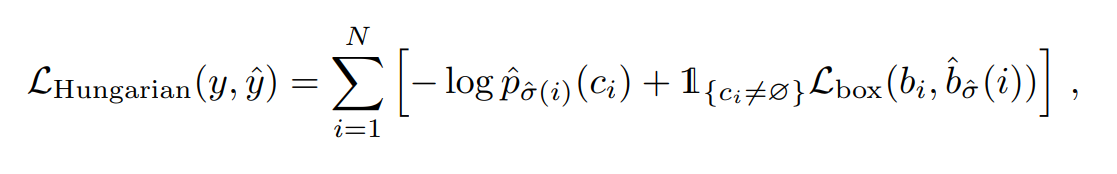

# Hungarian Loss — Notes & Explanation

## Formula

$$
\mathcal{L}_{\text{Hungarian}}(y, \hat{y}) = \sum_{i=1}^{N} \left[ -\log \hat{p}_{\hat{\sigma}(i)}(c_i) + \mathbb{1}_{\{c_i \ne \varnothing\}} \mathcal{L}_{\text{box}}(b_i, \hat{b}_{\hat{\sigma}(i)}) \right]
$$

- $y$: ground truth (class + box)  
- $\hat{y}$: predicted outputs (probability + box)  
- $\hat{\sigma}(i)$: matched prediction index from Hungarian algorithm  
- $\hat{p}_{\hat{\sigma}(i)}(c_i)$: predicted class probability

---

## Term-by-term Intuition

### 1. Classification Loss: `–log(p̂)`

- Applies cross-entropy-like penalty.
- p is a value between 0 and 1, hence, $ \log(p) < 0 $ 'negative' we negate it to keep loss positive.
- **Higher probabilities → lower loss**
- Example:
  - $ \log(0.8) \approx -0.22 \Rightarrow -\log(0.8) \approx 0.22 $
  - $ \log(0.2) \approx -1.6 \Rightarrow -\log(0.2) \approx 1.6 $

---

### 2. Box Loss Term: $ \mathbb{1}_{\{c_i \ne \varnothing\}} \mathcal{L}_{\text{box}} $

- Applied **only** when the object exists (i.e., not background)
- Penalizes incorrect box predictions

---

## 📦 Bounding Box Loss: $ \mathcal{L}_{\text{box}} $

$$
\mathcal{L}_{\text{box}} = \lambda_{\text{IoU}} (1 - \text{GIoU}) + \lambda_{\text{L1}} \left\| b_i - \hat{b}_{\hat{\sigma}(i)} \right\|_1
$$

- **Direct box regression**, not relative to anchors
- Combines:
  - **L1 Loss** → sensitive to scale
  - **GIoU Loss** → scale-invariant, improves performance on non-overlapping boxes, values range -1 to 1

---

## 📊 GIoU Behavior

| Scenario                      | GIoU     | GIoU Loss = $ 1 - \text{GIoU} $ |
|-------------------------------|----------|----------------------------|
| Perfect match                 | 1        | 0                          |
| Some overlap                  | ~0.1     | ~0.9                       |
| No overlap (but close)        | ~–0.2    | ~1.2                       |
| Far apart (worst case)        | –1       | 2                          |

---

## ✅ Summary

- **Classification term** uses `–log(p)` to encourage high class confidence
- **Box loss** combines L1 and GIoU for accuracy and robustness
- GIoU allows gradient even when boxes don’t overlap
- Final loss = sum over matched pairs using Hungarian algorithm
